In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA PREPROCESSING

save all the csv files for each year in dictionary.

In [14]:
data_holder = {}
min_year = 2002
max_year = 2020

for year in range(min_year, max_year+1):
    data_holder['data_'+str(year)] = pd.read_csv(f'weather_of_{year}.csv')

len(data_holder)

19

shows all the NA values for each csv file.

In [15]:
na_values_holder = {}

for x,y in zip(data_holder.keys(),data_holder.values()):
    na_values_holder[x] = y.isna().any(axis=1).sum()

na_values_holder


{'data_2002': 18,
 'data_2003': 20,
 'data_2004': 17,
 'data_2005': 9,
 'data_2006': 17,
 'data_2007': 7,
 'data_2008': 15,
 'data_2009': 15,
 'data_2010': 9,
 'data_2011': 16,
 'data_2012': 17,
 'data_2013': 16,
 'data_2014': 6,
 'data_2015': 7,
 'data_2016': 11,
 'data_2017': 3,
 'data_2018': 10,
 'data_2019': 8,
 'data_2020': 13}

tried to fill NA values which are in 'Pct Avg to Date', but I could not figure out how to calculate for this column and it turns out that there are only few rows that are missing this column so I decided to drop these rows that consist NA values in 'Pct Avg to Date' column

In [16]:
for x in data_holder.values():
    x.dropna(inplace=True)

In [17]:
na_values_holder = {}

for x,y in zip(data_holder.keys(),data_holder.values()):
    na_values_holder[x] = y.isna().any(axis=1).sum()

na_values_holder

{'data_2002': 0,
 'data_2003': 0,
 'data_2004': 0,
 'data_2005': 0,
 'data_2006': 0,
 'data_2007': 0,
 'data_2008': 0,
 'data_2009': 0,
 'data_2010': 0,
 'data_2011': 0,
 'data_2012': 0,
 'data_2013': 0,
 'data_2014': 0,
 'data_2015': 0,
 'data_2016': 0,
 'data_2017': 0,
 'data_2018': 0,
 'data_2019': 0,
 'data_2020': 0}

VISUALIZATION OF MONTHLY WATER PRECIPITATION FROM 2002 TO 2019

In [18]:
init_df = data_holder.get('data_2002').iloc[:,:14]
temp = init_df
temp.columns = ['ID', 'LOCATION', 'OCT2002', 'NOV2002', 'DEC2002', 'JAN2002', 'FEB2002', 'MAR2002', 'APR2002', 'MAY2002', 'JUN2002', 'JUL2002', 'AUG2002', 'SEP2002']

year = 2002
for df in data_holder:
    if df == 'data_2002':
        continue
    else:
        temp = temp.merge(data_holder.get(df).iloc[:,:14], how='inner', on=['ID',"LOCATION"], suffixes=(None, f'{year+1}'))
        year += 1
temp.head()

,ID,LOCATION,OCT2002,NOV2002,DEC2002,JAN2002,FEB2002,MAR2002,APR2002,MAY2002,...,DEC2020,JAN2020,FEB2020,MAR2020,APR2020,MAY2020,JUN2020,JUL2020,AUG2020,SEP2020
0,LEMO3,LEMOLO LAKE,5.13,10.30,12.72,11.48,4.99,6.32,5.49,1.14,...,5.59,18.19,4.34,4.32,3.37,4.05,2.52,0.0,0.02,2.33
1,MFR,MEDFORD,0.19,4.16,4.34,1.59,1.65,1.33,1.49,0.53,...,2.86,3.43,0.51,0.74,0.46,2.50,1.20,0.0,0.00,0.05
2,RIDO3,RIDDLE,1.02,6.84,6.71,4.81,2.76,1.71,1.23,1.30,...,4.20,7.34,1.35,1.74,1.34,2.16,0.81,0.0,0.00,0.72
3,TKFO3,TOKETEE FALLS,3.23,7.45,9.59,6.94,3.54,4.06,3.31,1.22,...,3.55,10.37,3.16,4.31,2.39,4.26,2.41,0.0,0.01,1.54
4,WINO3,WINCHESTER DAM,1.66,7.37,7.39,5.32,2.77,2.93,1.46,1.29,...,4.14,8.24,1.60,2.63,1.69,2.75,1.33,0.0,0.00,1.10


out of over 300 locations, there were only 34 locations where precipitation over 19 years was recorded. However, I thought it would be enough data since it has around 230 datasets to show the severity of drought these days.

VISUALIZATION OF THE AMOUNT OF TOTAL WATER PRECIPITATION OF CERTAIN LOCATION

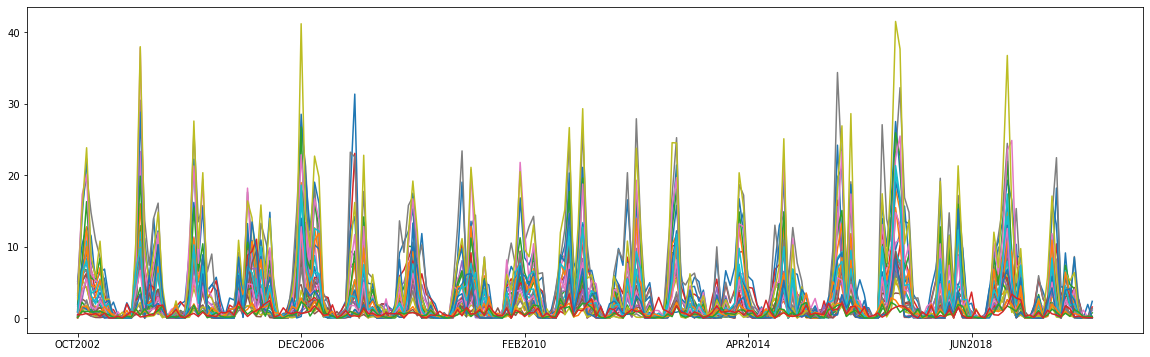

In [257]:
c_temp = temp
dc_temp = c_temp.drop(['ID'], axis=1)
tdc_temp = dc_temp.T
tdc_temp.columns = dc_temp['LOCATION']
final_df = tdc_temp.drop(['LOCATION'], axis=0)
final_df.plot(legend=None, figsize=(20,6))

plt.savefig('all_precip')

tried to show the precipitation of the whole locations(the locations that were recorded consistently from year of 2002 to 2019), but this graph does not show the severity of drought enough since there is a difference of precipitation depending on which area the location is located. 

Therefore..

1) I decided to illustrate graph choosing one are from certain locations such as (southern oregon coastal, oregon closed basins, northern california coastal, upper klamath, lower klamath, russian/napa/san francisco bay, sacramento/yuba/feather/american etc). These areas were already divided in the website in the first place.

2) i also decided to illustrate the change of yearly (total)precipitation between 2002 and 2019 which shows the decrease of precipitation in general.

i thought drought was a huge problem among everywhere in US, but after looking at the graph above, I think the drought was severe in certain locations because while certain locations definitely has a cycle of low/high amount of precipitation, certain locations have low amount of precipitation in general.

1)

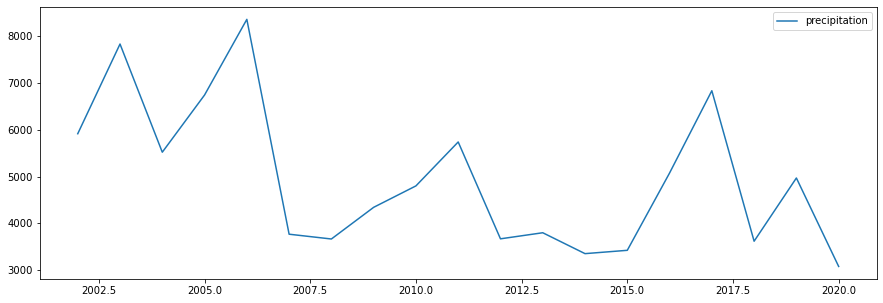

In [256]:
total_precip = {}
for year in range(min_year, max_year+1):
    total_precip[year] = [data_holder.get(f'data_{year}')['WY Total'].sum()]

total_precip
t_df = pd.DataFrame(data=total_precip)
total_df = t_df.rename(index={0:'precipitation'})
total_df.T.plot(figsize=(15,5))

plt.savefig('total_precip')

this graph helps us to understand that precipitation had been decreasing especially, between the year of 2007 may to 2015. Even though the precipitation had been increasing steadily until the May of 2017, it started to decrease again and reached the lowest point recently. By looking at this graph, it is obvious to see that drought has been a serious issue since 2007. 

I believe that the drought is still a serious issue because even though there are some locations that have a cycle of low/high amount of precipitation, there is no location that has consistency of high amount of precipitation while there are some locations that have consistency of low amount of precipitation.

2)

In [250]:
chosen_cities = ['LEMOLO LAKE', 'SUMMER LAKE', 'EUREKA', 'KENO', 'YREKA', 'DOWNTOWN SAN FRANCISCO', 'BUCKHORN', 'FIDDLETOWN DEXTER RANCH', 
'ASH MOUNTAIN', 'LEMON COVE', 'SANTA MARIA', 'DOWNTOWN LA', 'CEDARVILLE', 'BOCA RESERVOIR', 'FAIRMONT', 'ELKO',
'MCDERMITT', 'ELY', 'MCDERMITT', 'ST. GEORGE', 'MONTELLO', 'ENTERPRISE']

precipitations = {}

for city in chosen_cities:
    city_precips = []
    for year in range(min_year, max_year+1):
       dataframe = data_holder.get(f'data_{year}')
       data_precip = dataframe[dataframe['LOCATION'] == city]['WY Total'].values
       if len(data_precip) == 0:
           continue
       else:
            city_precips.append(data_precip[0])
    precipitations[city] = city_precips

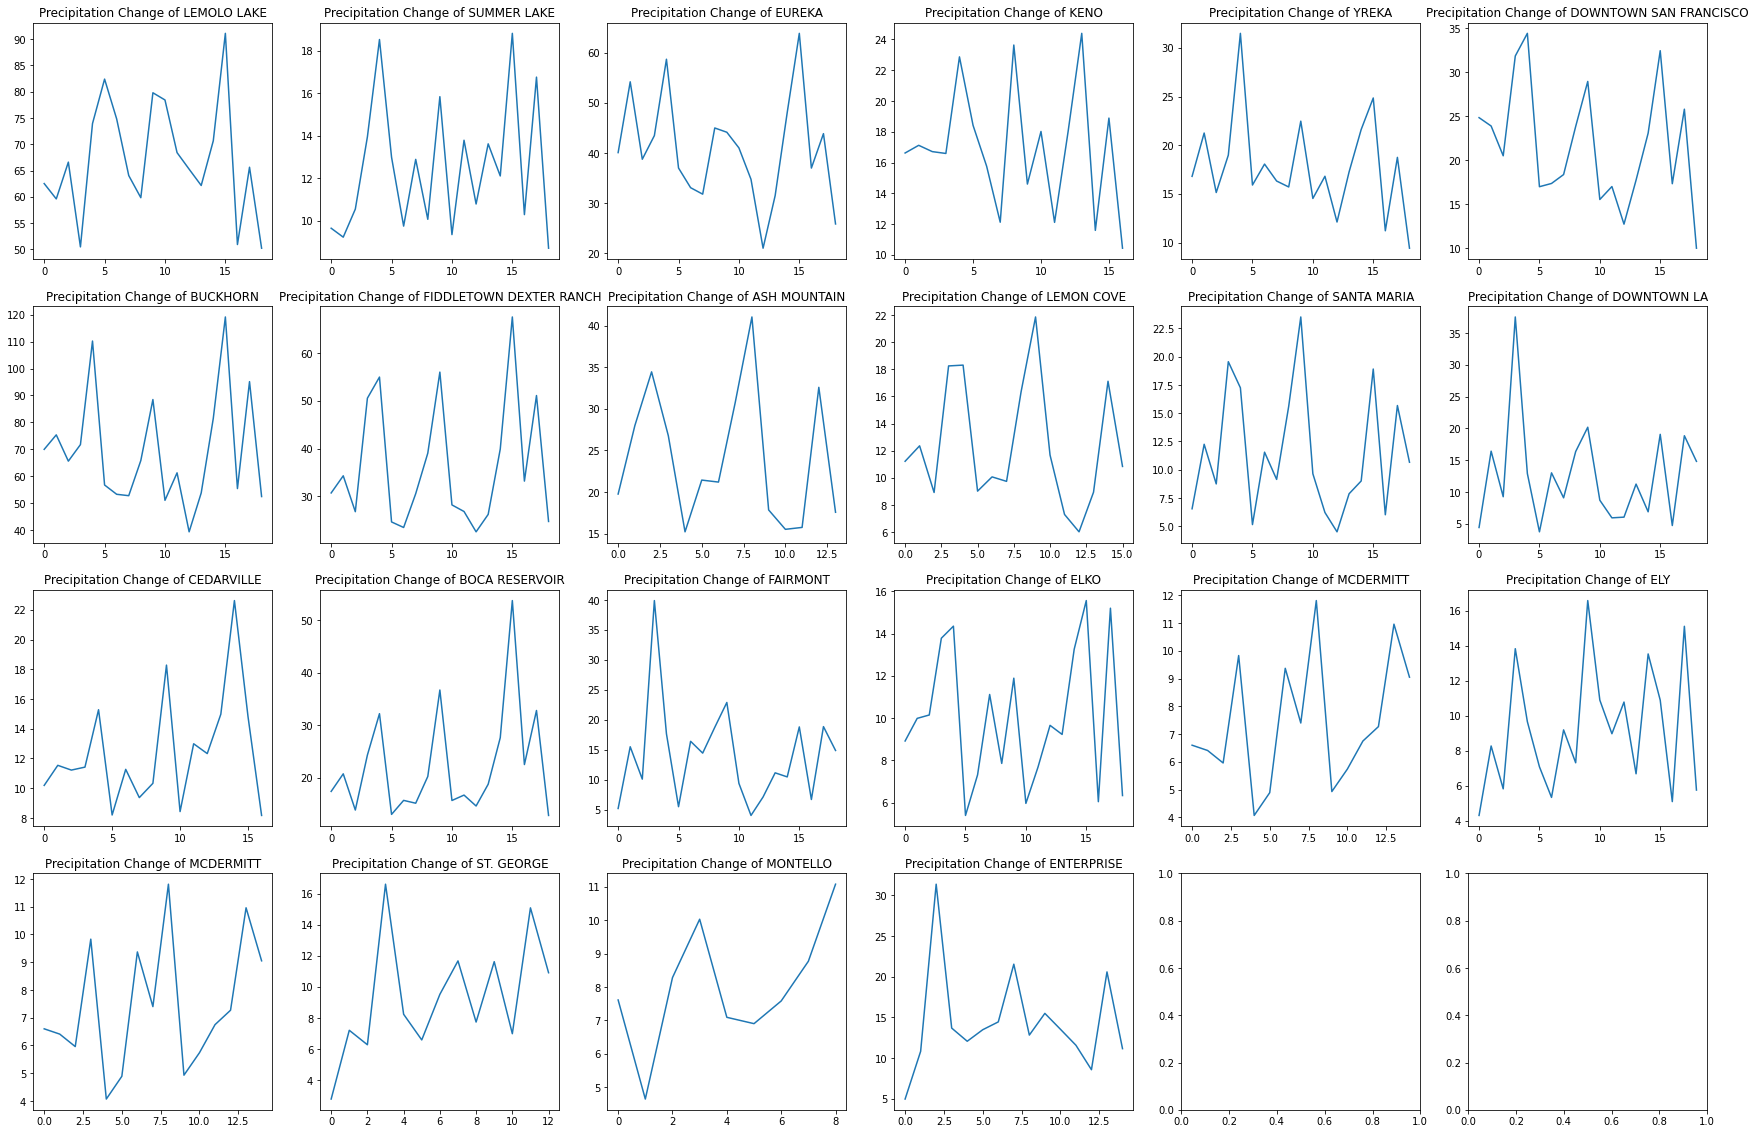

In [255]:
fig, ax = plt.subplots(4,6,figsize=(30,20))

max_width = 5
max_height = 3
w=0
h=0

for city in chosen_cities:
    city_df = pd.DataFrame(data=precipitations.get(city))
    ax[h,w].plot(city_df)
    ax[h,w].set_title(f'Precipitation Change of {city}')
    if w < max_width:
        w+=1
    else:
        w=0
        h+=1

plt.savefig('cities_precipitation')

on the website, the areas were divided by certain regions and i tried to pick an area that has average amount of precipitation among the region.even though most of the graphs show the cycle of high/low amount of precipitation, all of the areas except Montello seem to have a downside of precipitation recently. while most of the graphs have cycle, they have different amount of precipitations. certain area for example BUCKHORN reached over 100 inches in certain years twice within the cycle while MCDERMITT could only reach 12 inches in certain year. except for BUCKHORN and LEMOLO LAKE areas, most of the areas' highest precipitation are in between 11 to 40ish, which proves that the drought is a serious issue.